In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = r'D:\Learning\Codes\AQI\Data\Real-Data\Real_Combine.csv'
df = pd.read_csv(file)
df.head()

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4   40.333333
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1   17.708333
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

In [3]:
# Check for null values 
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    2
dtype: int64

In [4]:
#Drop the records with null values 
df = df.dropna()

In [5]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
X.isnull().sum()
y.isnull().sum()

0

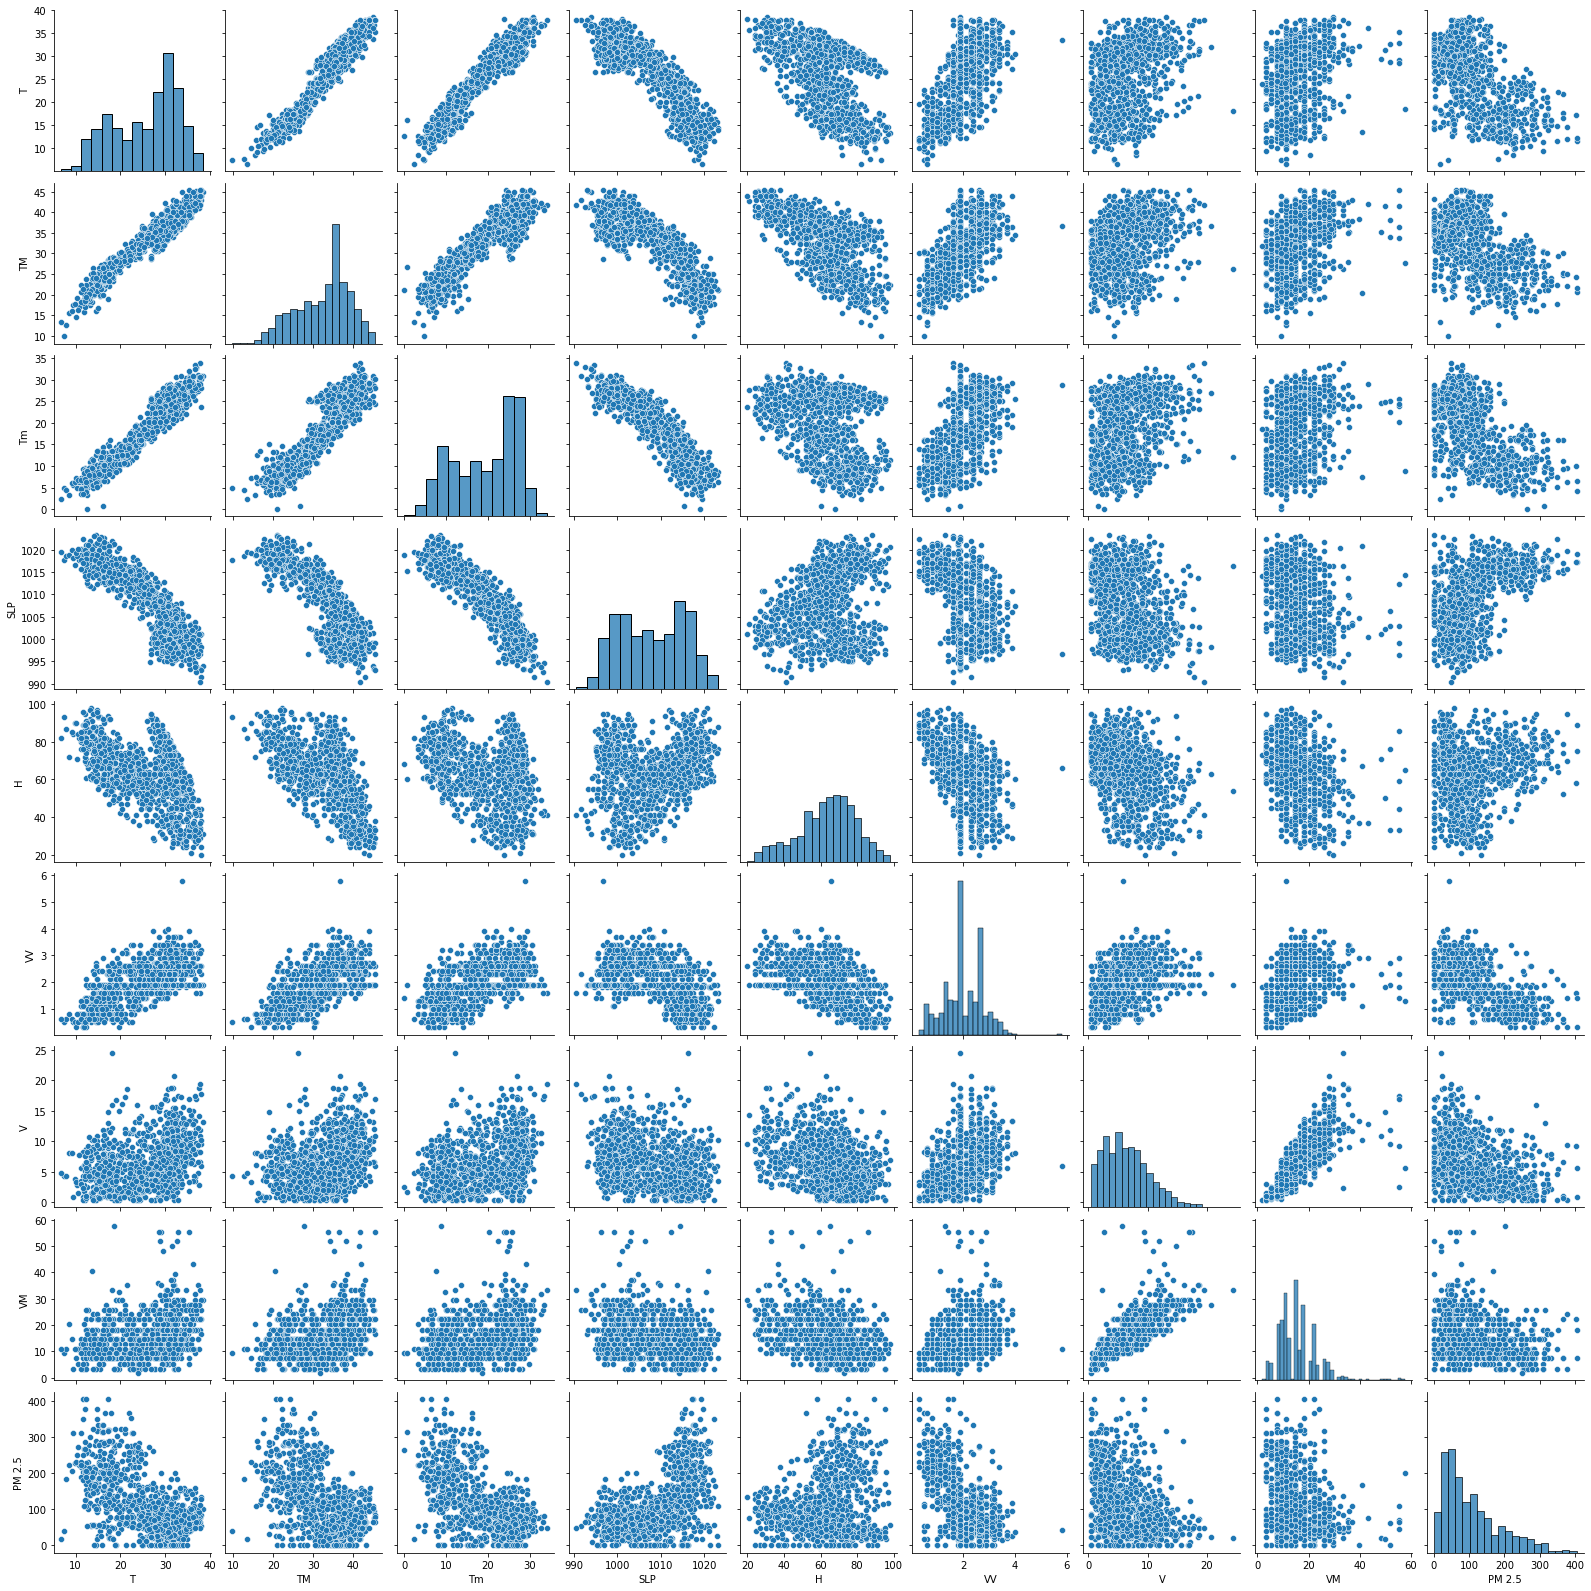

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.963416  0.957227 -0.883207 -0.488919  0.625547  0.320218   
TM      0.963416  1.000000  0.889979 -0.826008 -0.576799  0.598727  0.303218   
Tm      0.957227  0.889979  1.000000 -0.912333 -0.275047  0.547490  0.312165   
SLP    -0.883207 -0.826008 -0.912333  1.000000  0.231971 -0.483494 -0.325862   
H      -0.488919 -0.576799 -0.275047  0.231971  1.000000 -0.489597 -0.356241   
VV      0.625547  0.598727  0.547490 -0.483494 -0.489597  1.000000  0.369851   
V       0.320218  0.303218  0.312165 -0.325862 -0.356241  0.369851  1.000000   
VM      0.276548  0.285671  0.244408 -0.269129 -0.368694  0.325963  0.780952   
PM 2.5 -0.603371 -0.536969 -0.638572  0.586205  0.145657 -0.568058 -0.318189   

              VM    PM 2.5  
T       0.276548 -0.603371  
TM      0.285671 -0.536969  
Tm      0.244408 -0.638572  
SLP    -0.269129  0.586205  
H      -0.368694  0.145657  
VV      0.325963 -0.568058  
V       0.780952 -0.318189  
VM      1.000000 -0.252764  
PM 2.5 -0.252764  1.000000

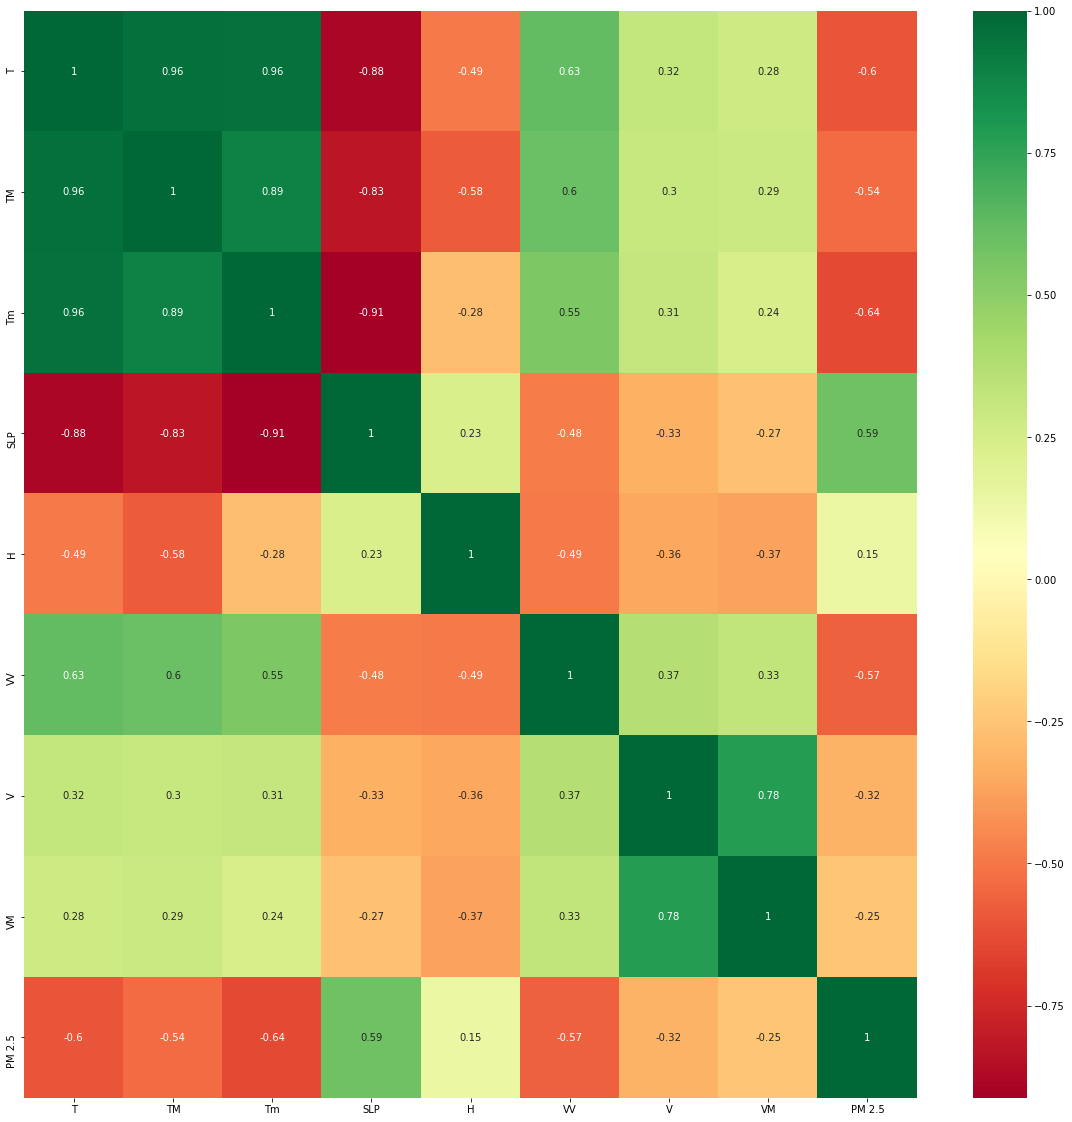

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [12]:
# Feature importance 
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [13]:
X.head()

T    TM   Tm     SLP     H   VV    V    VM
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2

In [14]:
print(model.feature_importances_)

[0.159087   0.09846982 0.2079509  0.1477684  0.08288203 0.18946368
 0.06516741 0.04921077]


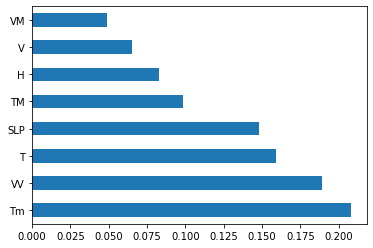

In [15]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

# Decision Tree Regressor

C:\Users\kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

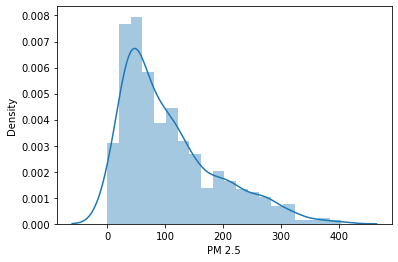

In [16]:
sns.distplot(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
dtree=DecisionTreeRegressor(criterion="mse")

In [20]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [21]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [22]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.07291831181631037


In [23]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

In [24]:
score.mean()

-0.06510615993897344

# Tree Visualization

In [25]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

In [26]:
features = list(df.columns[:-1])
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [27]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [28]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.810723 to fit



# Model Evaluation

In [29]:
prediction = dtree.predict(X_test)

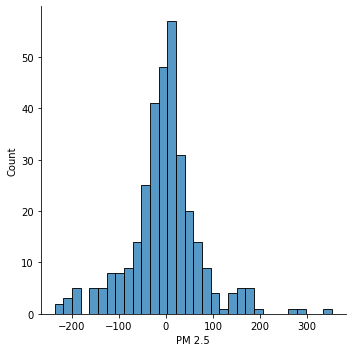

In [30]:
sns.displot(y_test-prediction)

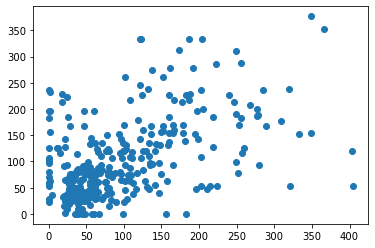

In [31]:
plt.scatter(y_test,prediction)

# Hyper parameter tuning Decision Tree Regressor

In [ ]:
DecisionTreeRegressor()

In [39]:
params = {
    'splitter': ['best','random'],
    'max_depth': [3,4,5,6,8,10,12,14],
    #'min_samples_split': 1,
    'min_samples_leaf': [1,2,3,4,5,6,7],
    'min_weight_fraction_leaf' : [0.1,0.2,0.3,0.4,0.5],
    'max_features': ["auto","log2","sqrt",None ],
    #'random_state' : None,
    'max_leaf_nodes': [None,10,20,30,40,50,60,70]
    #'min_impurity_decrease' :0.0,
    #'min_impurity_split': None,
    #'ccp_alpha' :0.0
}

In [40]:
## Hyperparameter tuning using Grid SearchCV
from sklearn.model_selection import GridSearchCV

In [44]:
random_search = GridSearchCV(dtree,params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [42]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [45]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 17920 candidates, totalling 179200 fits

 Time taken: 0 hours 4 minutes and 15.81 seconds.


In [46]:
random_search.best_params_

{'max_depth': 8,
 'max_features': 'log2',
 'max_leaf_nodes': 60,
 'min_samples_leaf': 7,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [47]:
random_search.best_score_

-3502.1948491111557

In [52]:
prediction = random_search.predict(X_test)

C:\Users\kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

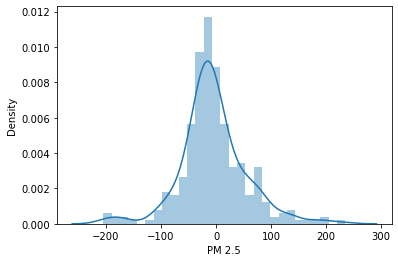

In [53]:
sns.distplot(y_test-prediction)

In [58]:
from sklearn import metrics

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 42.978457944630954
MSE: 3659.5167602422875
RMSE: 60.493939863777165


In [61]:
import pickle 

In [62]:
# open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search, file)